<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S7_C4_Clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Laboratorio del Profesor Ivan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/it-ces/Datasets/main/clusterdata.csv")

In [ ]:
df

,Unnamed: 0,x,y,id
0,0,-0.098959,-3.221422,1
1,1,7.826751,7.359078,2
2,2,5.598703,1.598871,0
3,3,6.187703,8.493880,2
4,4,-2.517677,-3.579739,1
...,...,...,...,...
895,895,-1.095122,-4.185166,1
896,896,-2.770716,-2.109758,1
897,897,5.021783,4.277867,0
898,898,5.903295,3.204633,0


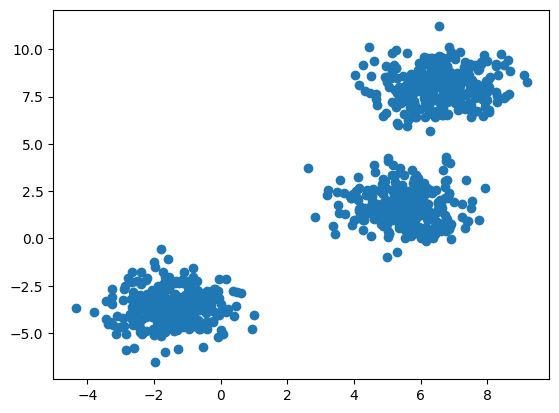

In [ ]:
plt.scatter(df.x,df.y)

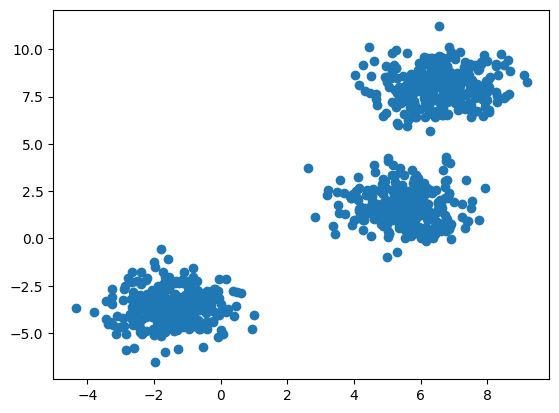

In [ ]:
plt.scatter(df['x'],df['y'])

In [ ]:
# Crear una lista con las columnas 'x' y 'y'
data = []

#for i in range(len(df)):
#    data.append([df['x'][i],df['y'][i]])

for index in df.index:
   data.append([df.loc[index,'x'], df.loc[index,'y']])

In [ ]:
#necesitamos seleccionar centroides aleatorios
np.array(data)[[1,2,3]]

array([[7.82675131, 7.35907843],
       [5.59870333, 1.59887094],
       [6.18770294, 8.49388044]])

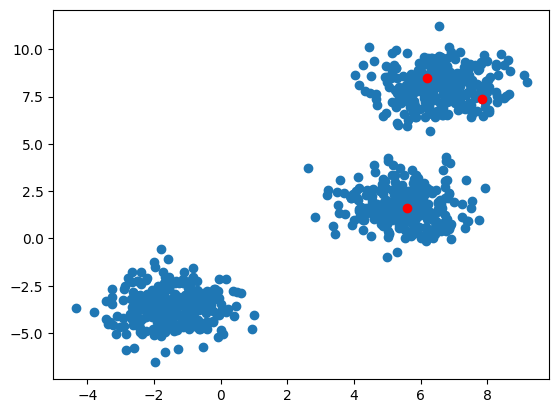

In [ ]:
plt.scatter(df.x,df.y)
plt.scatter(np.array(data)[[1,2,3]][:,0],np.array(data)[[1,2,3]][:,1],color='red')

In [ ]:
def centroides_iniciales (data,k):
    return np.array(data)[np.random.randint(0,len(data),k)]

In [ ]:
def distancia(P,K):
    return np.sqrt((P[0]-K[0])**2+(P[1]-K[1])**2)

In [ ]:
# tratara de guardar cada uno delos patrones que esten más cerca a un vector de centroides
def clusterFunc(data,centroids, k):
  cluster = {key:[] for key in range(k)} #este diccionario almacena que patron esta más cerca de cada centroide
  for point in data:
    aux = [] #lista auxiliar que guarda las distancias
    for centroid in centroids:
      aux.append(distancia(point,centroid))
    belong = aux.index(min(aux))
    cluster[belong].append(point)
  return cluster

In [ ]:
# ahora debo actualizar los centroides
def update_centroids(cluster):
  features = len(cluster[0][0]) # patrones clasificados en ese centroide
  centroids_updates  = []
  for c in cluster:
    size_cluster = len(cluster[c]) #numero de caracteristicas
    new = [] #guarda la suma de los valores en X y Y y lo divide por el tamaño, esto uno por uno (esta es otra lista auxiliar)
    for index in range(features):
        aux = 0
        for point in cluster[c]:
          aux = aux + point[index]

        new.append(aux/size_cluster)
    centroids_updates.append(new)
  return np.array(centroids_updates) #lo guardo como un arreglo

# Integrando las Funciones en Una Estructura de Ciclo por condicion


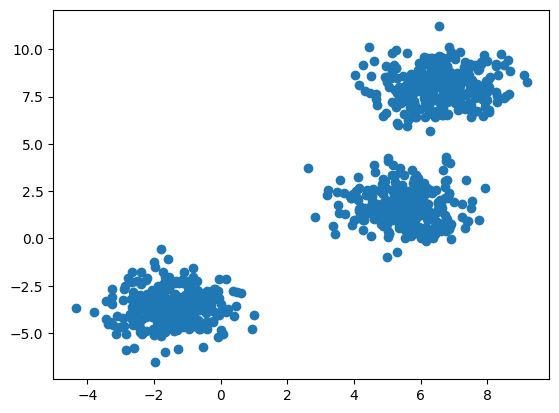

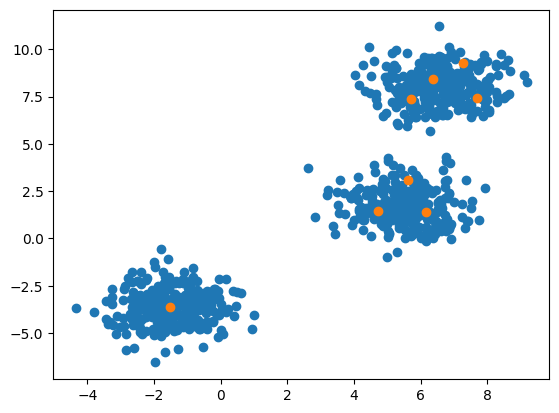

In [ ]:
# graficamos la iteracción de la actualización de los centroides hasta que su resultado sea igual
plt.scatter(df['x'], df['y'])
k = 8 # escoje 4 puntos aleatorios para empezar a iterar
centroids = centroides_iniciales(data,k)
cluster =  clusterFunc(data, centroids,k)
while  (centroids!=update_centroids(cluster)).all(): # mientras que sean diferentes (!=)
    centroids = update_centroids(cluster)
    cluster = clusterFunc(data, centroids,k)
plt.scatter(*zip(*update_centroids(cluster)))

In [ ]:
cluster

{0: [[5.737537917059292, 3.6095986638286983],
  [5.2585932896801575, 2.7904078580054024],
  [5.758762369330498, 2.4950977626321897],
  [6.049397699851788, 2.6771495735899227],
  [5.962929228903718, 2.842978142722729],
  [5.870760605349396, 3.344159037280985],
  [2.606110107318811, 3.712680122032901],
  [5.450225315021554, 2.829761944578882],
  [5.368170867046918, 3.7329317615832345],
  [6.885234066293823, 3.973700422192772],
  [6.182149433552258, 2.680529417905426],
  [6.731082904995592, 2.7157516758474305],
  [5.730182611456193, 2.442002611648605],
  [5.031715262612676, 4.09371052659859],
  [7.35959216684877, 3.0935546534867617],
  [6.230859518254557, 2.5635530992827387],
  [5.138471822232173, 3.3308318198279614],
  [5.766018385401828, 2.560181813661538],
  [4.9456493044380645, 2.6580075991881538],
  [6.091088830023367, 2.9479736006102675],
  [4.822755177434663, 2.8967614479133728],
  [6.775513623680771, 3.107109036166753],
  [5.61897595814758, 2.531301154453484],
  [4.120902008450929